In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from utils.database import *


/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
import argparse
#from pointnet import PointNetCls
from pointnet2 import *
from pointnet_datasets import pc_normalize, collate_fn, ColumbiaGraspDataset
import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import argparse
from pyntcloud import PyntCloud
import numpy as np
from sklearn.neighbors import KDTree

from utils.config import config
from utils import hand
from utils.database import *

In [3]:
parser = argparse.ArgumentParser('Pointnet Trainer')
parser.add_argument('--batch_size',                type=int,   help='batch size', default=4)
parser.add_argument('--num_epochs',                type=int,   help='number of epochs', default=10)
parser.add_argument('--log_directory',             type=str,   help='directory to save checkpoints and summaries', default='')
parser.add_argument('--checkpoint_path',           type=str,   help='path to a specific checkpoint to load', default='')
args = parser.parse_args('')

In [4]:
from torch.utils.data.sampler import SubsetRandomSampler

import warnings
warnings.simplefilter("ignore")

dataset = ColumbiaGraspDataset()
batch_size = args.batch_size
validation_split = .1
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = ToSubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler, collate_fn=collate_fn, num_workers=8)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler, collate_fn=collate_fn, num_workers=1)

KeyboardInterrupt: 

In [4]:
len(train_loader)

18178

In [5]:
# models = []
# for i, grasp in enumerate(data):
#     try:
#         models.append(mr.getModelInfo(grasp["scaled_model_id"]))
#     except Exception as e:
#         models.append((None, None, None))
#         #print(grasp["scaled_model_id"], i)
        
#models = [mr.getModelInfo(grasp["scaled_model_id"]) for grasp in data]

In [6]:
# 18497 
# 18498 
# 18499 
# 18500 
# 18501 
# 18502 
# 18504 
# 18505 
# 18506 
# 18503 
# 18507 
# 18508 
# 18509 
# 18510 
# 18512 
# 18513 


In [7]:
params = config(section='data')

#classifier = PointNet2Seg(num_classes=20)
optimizer = optim.Adam(classifier.parameters(), lr=0.01)
#criterion = torch.nn.MultiLabelSoftMarginLoss()
criterion = torch.nn.L1Loss()

print("Start training...")
cudnn.benchmark = True
classifier.cuda()

for epoch in range(args.num_epochs):
    print("--------Epoch {}--------".format(epoch))

    # train one epoch
    classifier.train()
    total_train_loss = 0
    correct_examples = 0
    

    for i, (pointclouds, labels) in enumerate(train_loader):
        
        pointclouds = pointclouds.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()
        preds = classifier(pointclouds).permute(0, 2, 1)

        loss = criterion(preds, labels)

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        
        #TODO last layer of classifier is linear or sigmoid???

        print("Train loss: {:.4f}".format(total_train_loss / (i+1)))
        
    print("Epoch Train loss: {:.4f}".format(total_train_loss / len(train_loader)))
       
    classifier.eval()
    total_valid_loss = 0
    
    for i, (pointclouds, labels) in enumerate(valid_loader):
        
        pointclouds = pointclouds.cuda()
        labels = labels.cuda()

        preds = classifier(pointclouds).permute(0, 2, 1)

        loss = criterion(preds, labels)

        total_valid_loss += loss.item()
        
    print("Valid loss: {:.4f}".format(total_valid_loss / len(valid_loader)))

    

Start training...
--------Epoch 0--------
Train loss: 0.2596
Train loss: 0.8807
Train loss: 0.7433
Train loss: 0.6575
Train loss: 0.6327
Train loss: 0.6209
Train loss: 0.5670
Train loss: 0.5286
Train loss: 0.5000
Train loss: 0.4731
Train loss: 0.4472
Train loss: 0.4208
Train loss: 0.3986
Train loss: 0.3793
Train loss: 0.3606
Train loss: 0.3459
Train loss: 0.3304
Train loss: 0.3160
Train loss: 0.3026
Train loss: 0.2903
Train loss: 0.2796
Train loss: 0.2690
Train loss: 0.2593
Train loss: 0.2504
Train loss: 0.2421
Train loss: 0.2343
Train loss: 0.2271
Train loss: 0.2199
Train loss: 0.2134
Train loss: 0.2073
Train loss: 0.2013
Train loss: 0.1959
Train loss: 0.1907
Train loss: 0.1857
Train loss: 0.1809
Train loss: 0.1764
Train loss: 0.1722
Train loss: 0.1682
Train loss: 0.1643
Train loss: 0.1606
Train loss: 0.1570
Train loss: 0.1538
Train loss: 0.1505
Train loss: 0.1473
Train loss: 0.1445
Train loss: 0.1417
Train loss: 0.1389
Train loss: 0.1363
Train loss: 0.1338
Train loss: 0.1313
Train lo

Train loss: 0.0213
Train loss: 0.0213
Train loss: 0.0212
Train loss: 0.0212
Train loss: 0.0212
Train loss: 0.0211
Train loss: 0.0211
Train loss: 0.0210
Train loss: 0.0210
Train loss: 0.0210
Train loss: 0.0209
Train loss: 0.0209
Train loss: 0.0208
Train loss: 0.0208
Train loss: 0.0208
Train loss: 0.0207
Train loss: 0.0207
Train loss: 0.0207
Train loss: 0.0206
Train loss: 0.0206
Train loss: 0.0206
Train loss: 0.0205
Train loss: 0.0205
Train loss: 0.0205
Train loss: 0.0204
Train loss: 0.0204
Train loss: 0.0203
Train loss: 0.0203
Train loss: 0.0203
Train loss: 0.0203
Train loss: 0.0202
Train loss: 0.0202
Train loss: 0.0202
Train loss: 0.0201
Train loss: 0.0201
Train loss: 0.0200
Train loss: 0.0200
Train loss: 0.0200
Train loss: 0.0199
Train loss: 0.0199
Train loss: 0.0199
Train loss: 0.0199
Train loss: 0.0198
Train loss: 0.0198
Train loss: 0.0198
Train loss: 0.0197
Train loss: 0.0197
Train loss: 0.0197
Train loss: 0.0196
Train loss: 0.0196
Train loss: 0.0196
Train loss: 0.0195
Train loss: 

Train loss: 0.0131
Train loss: 0.0131
Train loss: 0.0131
Train loss: 0.0131
Train loss: 0.0131
Train loss: 0.0131
Train loss: 0.0131
Train loss: 0.0131
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0130
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0129
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0128
Train loss: 0.0127
Train loss: 0.0127
Train loss: 0.0127
Train loss: 0.0127
Train loss: 0.0127
Train loss: 0.0127
Train loss: 0.0127
Train loss: 0.0127
Train loss: 

Process Process-7:
Process Process-3:
Process Process-1:
Process Process-5:
Process Process-6:
Process Process-2:
Process Process-8:
Process Process-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/m

  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/multiprocessing/connection.py", line 911, in wait
    ready = selector.select(timeout)
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/multiprocessing/connection.py", line 911, in wait
    ready = selector.select(timeout)
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/multiprocessing/connection.py", line 911, in wait
    ready = selector.select(timeout)
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
  File "/home/mgriff94_utexas_edu/miniconda3/lib/python3.6/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
  File

KeyboardInterrupt: 

In [8]:
torch.save(classifier, 'train_model.pth') #L1Loss

In [ ]:
#Visualize the finger tip predictions?

In [2]:
%matplotlib inline

{'scaled_model_id': 11280, 'grasp_pregrasp_joints': [5.0, 0.039564, 0.98025, 0.68504, 0.431235, 0.0, 1.04835, 0.58142, 0.370746, -0.08519, 0.943203, 0.511562, 0.4353, -0.043307, 0.813905, 0.138276, 0.271605, 0.068696, -0.843149, 0.763064, 0.324506], 'grasp_grasp_joints': [5.0, 0.039564, 1.12931, 0.834103, 0.580298, 0.0, 1.37741, 0.910483, 0.699809, -0.08519, 1.5708, 1.16187, 1.08561, -0.043307, 1.5708, 1.14734, 1.28067, 0.068696, -0.843149, 1.05025, 0.611694], 'grasp_pregrasp_position': [0.0, -28.760848, -3.150388, -74.008882, 0.395125, -0.013213, 0.569457, -0.720709], 'grasp_grasp_position': [0.0, -37.0782, -2.56252, -61.5399, 0.395125, -0.013213, 0.569457, -0.720709], 'grasp_contacts': [-124.444, -25.0321, 34.9291, 14.7855, -8.53847, 4.25957, 2.55814, -0.00626247, 3.17927, 8.78805, 0.507338, 25.6434], 'grasp_epsilon_quality': 0.0320904, 'grasp_volume_quality': 0.016866}


<IPython.core.display.Javascript object>


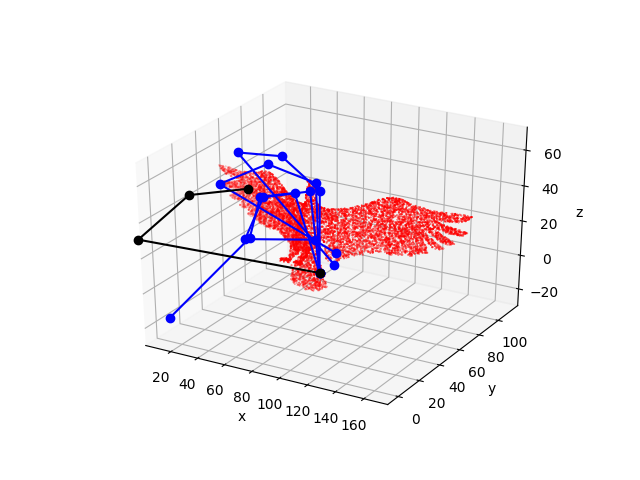

In [9]:
from pointnet_datasets import *

mr = ModelReader()

batch = mr.getGraspBatch()

one_grasp = batch[1]
print(one_grasp)
params = config(section='data')

scale, grasp_rescale, model_path = mr.getModelInfo(one_grasp["scaled_model_id"])


pt_cld = sample_pt_cld(scale, grasp_rescale, params['model_dir'] + model_path)
hand_pts = get_joint_locations(one_grasp['grasp_grasp_joints'], one_grasp['grasp_grasp_position'])


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(hand_pts[0, 0], hand_pts[0, 1], hand_pts[0, 2], zdir='z', c= 'red', s=10)
ax.scatter(pt_cld[:, 0], pt_cld[:, 1], pt_cld[:, 2], zdir='z', c= 'red', s=0.1)

# Axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax = ax.axis('equal')

# Draw hand
plt.plot(np.append(hand_pts[0, 0], hand_pts[1:5, 0]),   np.append(hand_pts[0, 1], hand_pts[1:5, 1]),   np.append(hand_pts[0, 2], hand_pts[1:5, 2]), '-o', c= 'blue')
plt.plot(np.append(hand_pts[0, 0], hand_pts[5:9, 0]),   np.append(hand_pts[0, 1], hand_pts[5:9, 1]),   np.append(hand_pts[0, 2], hand_pts[5:9, 2]), '-o', c= 'blue')
plt.plot(np.append(hand_pts[0, 0], hand_pts[9:13, 0]),  np.append(hand_pts[0, 1], hand_pts[9:13, 1]),  np.append(hand_pts[0, 2], hand_pts[9:13, 2]),'-o', c= 'blue')
plt.plot(np.append(hand_pts[0, 0], hand_pts[13:17, 0]), np.append(hand_pts[0, 1], hand_pts[13:17, 1]), np.append(hand_pts[0, 2], hand_pts[13:17, 2]),'-o', c= 'blue')
plt.plot(np.append(hand_pts[0, 0], hand_pts[17:21, 0]), np.append(hand_pts[0, 1], hand_pts[17:21, 1]), np.append(hand_pts[0, 2], hand_pts[17:21, 2]),'-o', c="black")

plt.show()

In [7]:
#classifier2 = PointNet2Seg(num_classes=20)
#load saved model
classifier2 = torch.load('train_model.pth')
classifier2 = classifier2.eval().cuda()

pointcloud = torch.tensor(pc_normalize(pt_cld)).unsqueeze(0).permute(0, 2, 1).cuda()
#pointclouds is a bs*3*n tensor (bs is batch_size so 1 for a particular mesh, n is the number of sampled points (10000 by default))

preds = classifier2(pointcloud).permute(0, 2, 1)
#preds is a bs*n*20 output (where it outputs the 'probability' of each sampled point (of 10k) being a contact point for any of the 20 joints)
#To use, just get the hand_pts from above (excluding root), find the closest point in pointclouds to each hand_pt (if it's within like 10 mm of points), and find the probability of those points being that respective joint (if less than 0.1, force it to be 0.1)
#If joint is more than 10mm from point cloud (not a contact joint) then just use default value as described in Shape2Pose paper

joints, probs = get_joint_probs(preds, pt_cld, hand_pts)
#print(probs)
#probs[probs < 0.1] = 0.1
print(joints, probs)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [ 3.6239144e-04 -1.9952580e-03  1.3684207e-03  4.1392224e-04
  1.2363971e-03 -1.0391154e-03 -1.4065015e-03  1.2867054e-03
 -5.3545507e-04 -1.2186075e-03 -1.4852243e-03 -1.4990073e-03
  8.9918019e-04  1.3819622e-03  8.6433120e-06 -3.9018385e-04
  4.8530870e-04 -1.3223429e-03  2.2761477e-04]


array([0.05265956, 0.05253555, 0.05271256, 0.05266227, 0.0527056 ,
       0.0525858 , 0.05256648, 0.05270825, 0.05261229, 0.05257636,
       0.05256235, 0.05256163, 0.05268782, 0.05271327, 0.05264093,
       0.05261994, 0.05266603, 0.05257091, 0.05265246], dtype=float32)